In [1]:
import pandas as pd

# Load the real dataset
df = pd.read_csv("../data/bank_marketing.csv", sep=';')  # NOTE: semicolon separator!

# Quick preview
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [3]:
# check for missing values (some 'unknown' strings need handling)
df.replace('unknown', pd.NA, inplace=True)

# now check missing values again
df.isnull().sum()


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [6]:
# drop rows missing job, marital, or education info
df.dropna(subset=['job', 'marital', 'education'], inplace=True)

# reset index after dropping
df.reset_index(drop=True, inplace=True)

df.isnull().sum()



age                  0
job                  0
marital              0
education            0
default           7964
housing            946
loan               946
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
# total customers in the campaign
total_customers = len(df)
total_customers


39191

In [8]:
# overall conversion rate
conversion_rate = df['y'].value_counts(normalize=True)['yes'] * 100
conversion_rate


11.125003189507796

In [9]:
# conversion rate by month
conversion_by_month = df.groupby('month')['y'].value_counts(normalize=True).unstack()['yes'] * 100
conversion_by_month = conversion_by_month.sort_values(ascending=False)
conversion_by_month


month
mar    50.590551
dec    47.904192
sep    45.155039
oct    45.132743
apr    20.056157
jun    10.410850
aug    10.324533
nov     9.841430
jul     8.999557
may     6.459476
Name: yes, dtype: float64

In [10]:
# average number of contacts (campaign field)
avg_contacts = df['campaign'].mean()
avg_contacts


2.5663800362328084

## Basic Visualizations

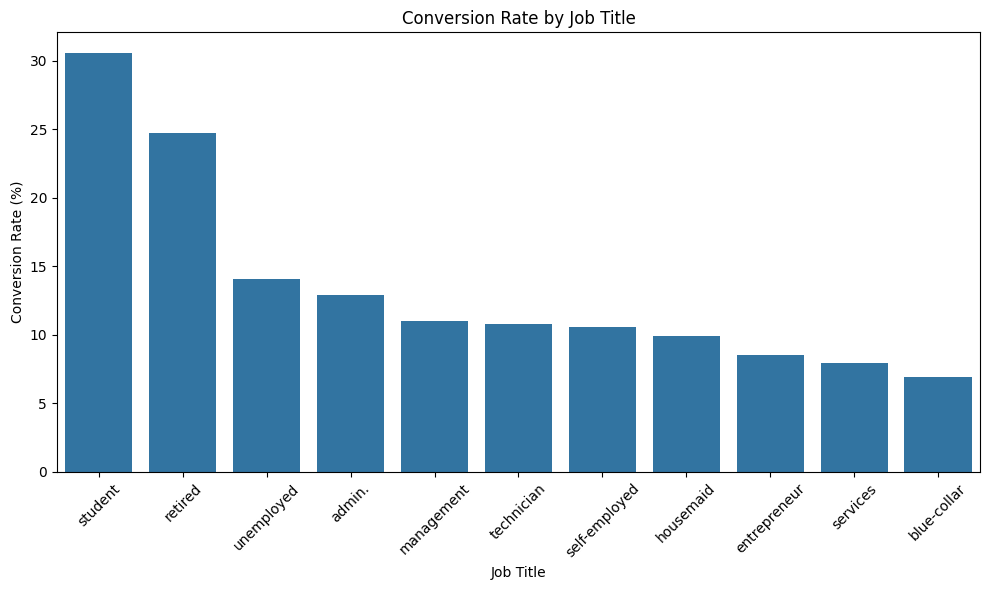

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate conversion rate by job
conversion_by_job = df.groupby('job')['y'].value_counts(normalize=True).unstack()['yes'] * 100
conversion_by_job = conversion_by_job.sort_values(ascending=False)

# bar chart for conversion by job
plt.figure(figsize=(10,6))
sns.barplot(x=conversion_by_job.index, y=conversion_by_job.values)
plt.xticks(rotation=45)
plt.title('Conversion Rate by Job Title')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Job Title')
plt.tight_layout()
plt.show()


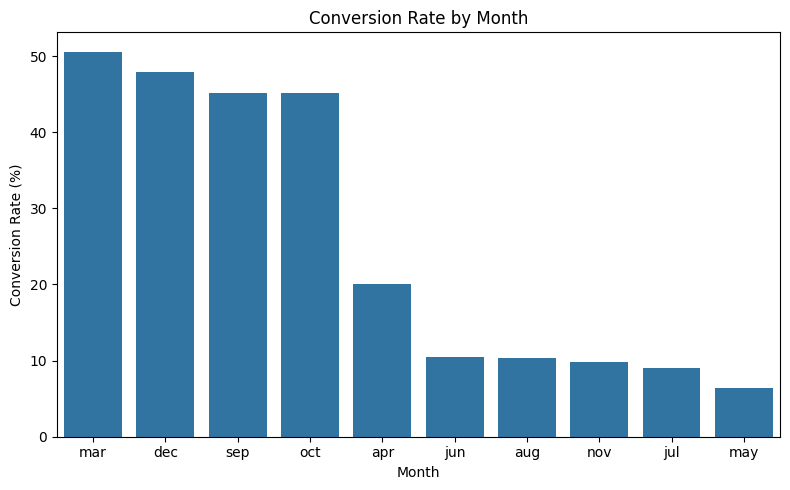

In [13]:
# bar chart for conversion by month
plt.figure(figsize=(8,5))
sns.barplot(x=conversion_by_month.index, y=conversion_by_month.values)
plt.title('Conversion Rate by Month')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


In [14]:
print(f"Total Customers: {total_customers:,}")
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")
print(f"Average Number of Contacts Needed: {avg_contacts:.2f}")


Total Customers: 39,191
Overall Conversion Rate: 11.13%
Average Number of Contacts Needed: 2.57
